Тетрадь проверки гипотез

In [30]:
# импорт необходимых и тестируемых библиотек
from nifti_tools import (create_bitmap_mask, 
                         get_data_from_nifti_file, 
                         convert_nifti_to_4ch, 
                         create_bitmap_mask, 
                         create_bitmap_slice, 
                         create_training_dataset_file,
                         get_mask_segmentation_counts)
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import base64
from io import BytesIO
import json
from pprint import pprint

In [33]:
data = get_data_from_nifti_file('datasets/Task02_Heart/imagesTr/la_003.nii.gz')
mask = get_data_from_nifti_file('datasets/Task02_Heart/labelsTr/la_003.nii.gz')

In [34]:
layers_count = data.shape[2]
transpored_data = data.T
transpored_mask = mask.T

In [ ]:
for i in range(layers_count):
    fig, axs = plt.subplots(1,3)
    '''axs[0].imshow(transpored_data[i])
    axs[1].imshow(transpored_mask[i])
    plt.show()'''
    axs[0].set_title(f'Layer {i}')
    axs[0].imshow(transpored_data[i])
    axs[0].imshow(transpored_mask[i], alpha=0.3)
    axs[1].imshow(transpored_mask[i])
    axs[2].imshow(transpored_data[i])
    plt.show()
    #print(transpored_data[i].shape)


In [10]:
'''for i in range(len(transpored_data[59])):
    print(transpored_data[59][i].max())'''

print(transpored_data.max())

1999.0


In [ ]:
im = Image.fromarray(transpored_mask[0])
im.show()

In [6]:
transpored_mask[60].shape


(320, 320)

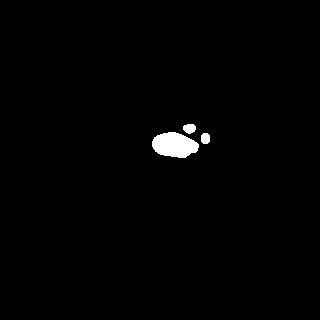

In [11]:
create_bitmap_mask(transpored_mask[60])

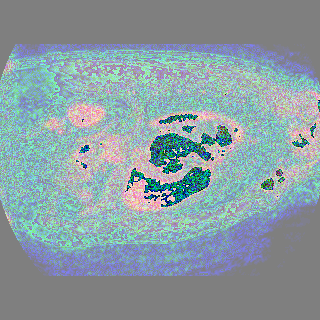

In [12]:
create_bitmap_slice(transpored_data[60])

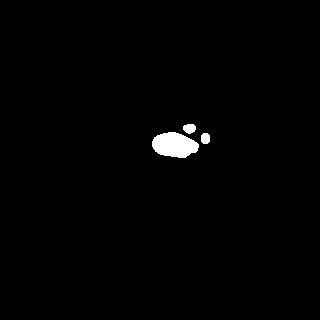

In [ ]:
create_bitmap_mask(transpored_mask[60])

In [ ]:
convert_nifti_to_4ch(1234)


(51, 76, 102, 255)

In [ ]:
for i in range(40,transpored_data.shape[0]):
    fig, axs = plt.subplots(1,3)
    axs[0].set_title(f'Layer {i}')
    axs[0].imshow(create_bitmap_slice(transpored_data[i]))
    axs[0].imshow(create_bitmap_mask(transpored_mask[i]),alpha=0.5)
    axs[1].imshow(create_bitmap_mask(transpored_mask[i]))
    axs[2].imshow(create_bitmap_slice(transpored_data[i]))
    plt.show()

In [ ]:
create_training_dataset_file(dataset_root_folder = 'datasets/img',
                              data = transpored_data[60],
                              labels= transpored_mask[60],
                              caption='la_003')

In [ ]:
def create_training_dataset_file(dataset_root_folder: str, data: np.array, labels: np.array, caption: str):
    """Create bitmap files for training dataset:
    dataset_root_folder/caption_image.bmp and dataset_root_folder/caption_mask.bmp 

    Args:
        dataset_root_folder (str): folser for storing training dataset
        data (np.array): X
        labels (np.array): y
        caption (str): caption for files
    """
    image = create_bitmap_slice(data)
    mask = create_bitmap_mask(labels)
    image.save(f'{dataset_root_folder}/{caption}_image.bmp')
    buffered = BytesIO()
    mask.save(fp=buffered, format='BMP')
    
    mask_json = dict()
    mask_json['segmentation_mask'] = str(base64.b64encode(buffered.getvalue()))
    mask_json['class_map'] = {"0":"other", "1":"left atrium"}
    mask_json['image'] = {'width': mask.width, 'height': mask.height}
    
    with open(f'{dataset_root_folder}/{caption}_image.json','w') as mask_file:
        json.dump(mask_json, mask_file)
    
create_training_dataset_file(dataset_root_folder = 'datasets/img',
                              data = transpored_data[60],
                              labels= transpored_mask[60],
                              caption='la_003')

In [39]:
%%time

a = [[0, 0, 0, 0],
     [0, 1, 1, 0],
     [0, 0, 1, 0],
     [0, 0, 0, 0]
     ]
a = np.array(a)



pprint(get_mask_segmentation_counts(transpored_mask[60], 0))
pprint(get_mask_segmentation_counts(transpored_mask[60], 1))


[0,
 48781,
 6,
 312,
 10,
 308,
 13,
 307,
 15,
 304,
 16,
 303,
 18,
 302,
 19,
 301,
 19,
 300,
 21,
 299,
 21,
 299,
 21,
 298,
 22,
 298,
 23,
 297,
 23,
 297,
 23,
 297,
 23,
 296,
 24,
 296,
 24,
 296,
 24,
 296,
 25,
 295,
 25,
 295,
 25,
 295,
 25,
 295,
 25,
 296,
 24,
 296,
 24,
 296,
 25,
 296,
 24,
 296,
 24,
 296,
 24,
 297,
 23,
 288,
 4,
 5,
 23,
 287,
 6,
 5,
 22,
 287,
 7,
 4,
 22,
 287,
 8,
 4,
 20,
 287,
 9,
 4,
 19,
 288,
 10,
 4,
 18,
 288,
 10,
 4,
 17,
 289,
 10,
 5,
 15,
 290,
 9,
 6,
 14,
 291,
 9,
 7,
 13,
 291,
 8,
 8,
 13,
 292,
 7,
 9,
 12,
 293,
 4,
 12,
 11,
 309,
 10,
 311,
 8,
 313,
 4,
 947,
 7,
 312,
 9,
 310,
 11,
 309,
 11,
 309,
 11,
 309,
 11,
 309,
 11,
 310,
 9,
 312,
 7,
 35378]
[48781,
 6,
 312,
 10,
 308,
 13,
 307,
 15,
 304,
 16,
 303,
 18,
 302,
 19,
 301,
 19,
 300,
 21,
 299,
 21,
 299,
 21,
 298,
 22,
 298,
 23,
 297,
 23,
 297,
 23,
 297,
 23,
 296,
 24,
 296,
 24,
 296,
 24,
 296,
 25,
 295,
 25,
 295,
 25,
 295,
 25,
 295,
 25,
 296

In [48]:
img = Image.open('datasets/img/la_007_layer60_mask.bmp')
iarr = np.int0(img)
pprint(get_mask_segmentation_counts(iarr, 1))

[41462,
 3,
 314,
 8,
 311,
 10,
 309,
 12,
 308,
 13,
 305,
 16,
 289,
 32,
 286,
 35,
 284,
 41,
 277,
 44,
 275,
 46,
 272,
 48,
 270,
 51,
 268,
 53,
 266,
 54,
 266,
 44,
 2,
 9,
 265,
 43,
 4,
 8,
 265,
 44,
 3,
 9,
 264,
 44,
 4,
 8,
 264,
 45,
 4,
 7,
 264,
 45,
 6,
 4,
 265,
 47,
 5,
 3,
 265,
 48,
 273,
 48,
 272,
 49,
 271,
 49,
 272,
 49,
 271,
 49,
 271,
 48,
 273,
 36,
 3,
 8,
 274,
 32,
 9,
 3,
 277,
 29,
 293,
 25,
 297,
 22,
 301,
 9,
 50071]
